In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import json
import tensorflow as tf
import csv
import random
import numpy as np
import zipfile

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size= 160000
# Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1

corpus = []


In [3]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
#     -O /tmp/training_cleaned.csv
# !wget --no-check-certificate \
#     https://nlp.stanford.edu/data/wordvecs/glove.6B.zip \
#     -O /tmp/glove.6B.zip

# local_zip = '/tmp/glove.6B.zip'

# zip_ref = zipfile.ZipFile(local_zip , 'r')
# zip_ref.extractall('/tmp')


In [4]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook


num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
      list_item = []
        # YOUR CODE HERE
      list_item.append(row[5])
      list_item.append(0 if row[0]=='0' else 1)
      num_sentences = num_sentences + 1
      corpus.append(list_item)
    # print(row)


In [5]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [6]:
sentences=[]
labels=[]
random.shuffle(corpus)

for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer(oov_token = oov_tok)
tokenizer.fit_on_texts(sentences)# YOUR CODE HERE)

word_index = tokenizer.word_index
vocab_size=len(word_index)# YOUR CODE HERE)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(
    sequences
    ,maxlen = max_length
    ,padding=padding_type
    ,truncating=trunc_type
    )# YOUR CODE HERE)

split = int(test_portion * training_size)

test_sequences = np.array(padded[:split])# YOUR CODE HERE]
training_sequences = np.array(padded[split:training_size])# YOUR CODE HERE]
test_labels = np.array(labels[:split])# YOUR CODE HERE]
training_labels = np.array(labels[split:training_size])# YOUR CODE HERE]

In [7]:
sentences[1],sequences[1],padded[1],labels[1]

("I feel so empty without an episode of Jonas .. can't wait for this saturday! Disney can't do this to us ",
 [2,
  110,
  16,
  1691,
  398,
  94,
  990,
  13,
  804,
  72,
  143,
  11,
  27,
  431,
  1620,
  72,
  41,
  27,
  3,
  208],
 array([   2,  110,   16, 1691,  398,   94,  990,   13,  804,   72,  143,
          11,   27,  431, 1620,   72], dtype=int32),
 0)

In [8]:
print(training_sequences.shape,training_labels.shape)
print(test_sequences.shape,test_labels.shape)

(144000, 16) (144000,)
(16000, 16) (16000,)


In [9]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

138516
2


In [10]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier


embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [11]:
print(len(embeddings_matrix))
# Expected Output
# 138859

138517


In [12]:
embeddings_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [13]:
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,LSTMCell,Dense,Dropout,Softmax
model = tf.keras.Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length , weights=[embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
    Bidirectional(LSTM(128,return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(1,activation = 'sigmoid'),
])
model.compile(
    optimizer = tf.optimizers.RMSprop(lr = 0.001)
    ,loss = ['binary_crossentropy']
    ,metrics = ['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
    )

print("Training Complete")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           13851700  
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 256)           234496    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 14,250,677
Trainable params: 398,977
Non-trainable params: 13,851,700
_________________________________________________________________
Epoch 1/5
4500/4500 - 243s - loss: 0.5332 - accuracy: 0.7295 - val_loss: 0.4932 - val_accuracy: 0.7617
Epoch 2/5
4500/4500 - 230s - loss: 0.4777 - accuracy: 0.7692 - val_loss: 0.4709 - val_accuracy: 0.7778
Epoch 3/5
4500/4500 - 234s - l

<Figure size 432x288 with 0 Axes>

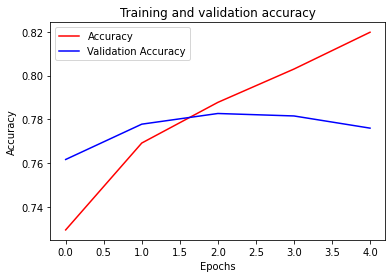

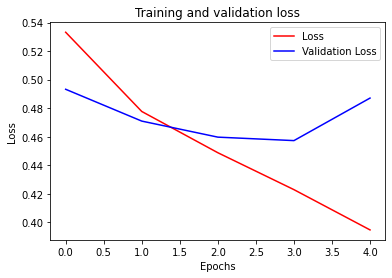

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!